# Teorica

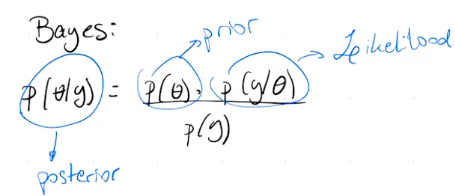

Vamos a ver otra forma de calcular el prior

Hasta ahora vimos 2 formas:
+ Analítica $\rightarrow$ prior conjugado
+ Grid Approximation
  + Ventajas: Podemos usar cualquier prior
  + Desventajas: Computacionalmente costoso, "costo inútil"  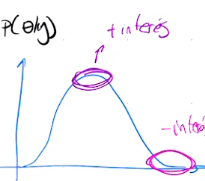

### Aproximación Cuadrática:

Si conozco la distribucion $P(\theta|y)$(posterior)

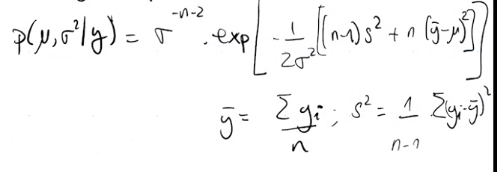

Si me interesa un punto de la distribucion, seguramente sea el maximo (moda) y "como se ve la varianza" desde ese máximo.

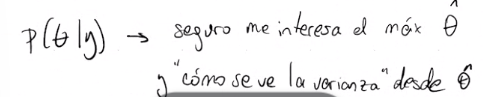

Agarremos la log(posterior) y aproximemos:

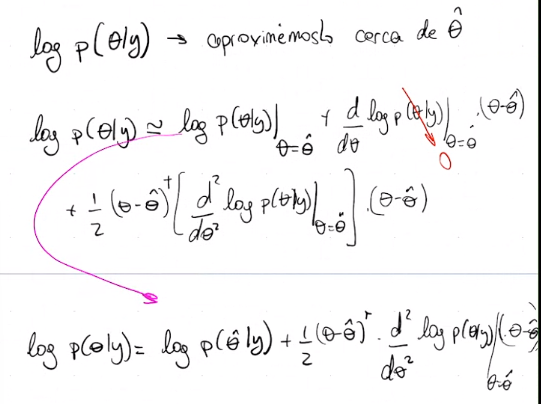  
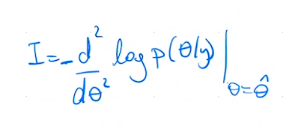 $I$: matriz info de fischer  
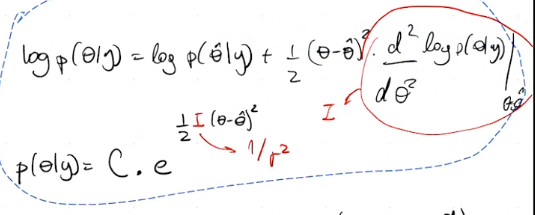
entonces  
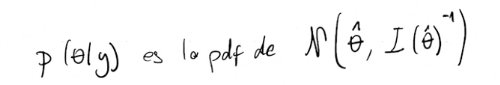

Esto es la raiz de la aproximación cuadrática.  
Si la posterior es una normal, esto no será una aproximación (es mejor).

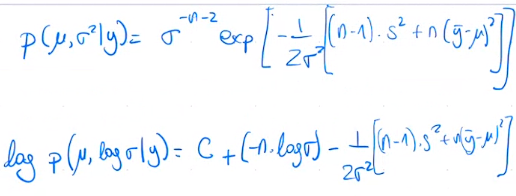

Lo primero que tengo que hacer es encontrar la moda  

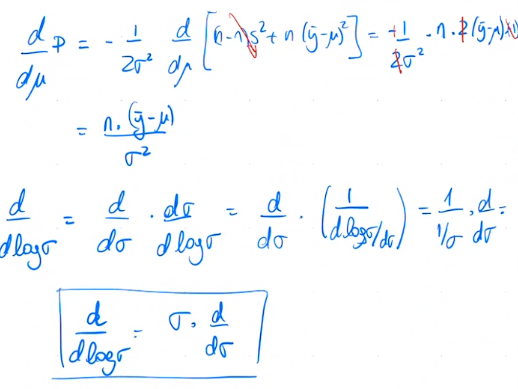  
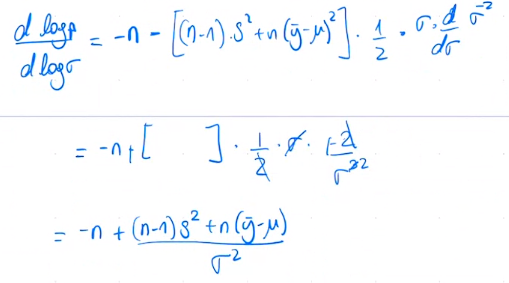

ahora puedo calcular la moda (creo, me perdi)

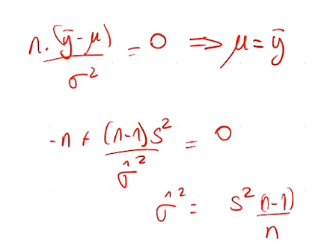

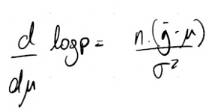  
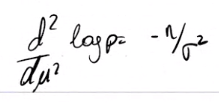

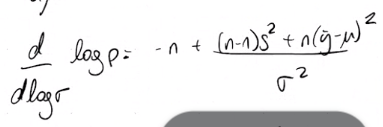  
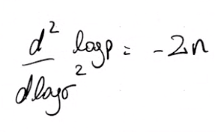

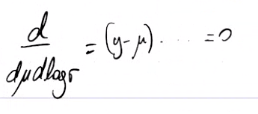

entonces la matriz de fischer queda:  
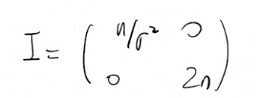

y la posterior queda como una multivariada normal:  
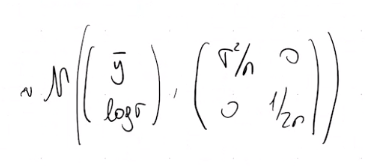

Si no conozco la posterior, que hago?

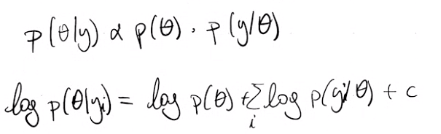

vamos a ver la derivada segunda del log(posterior)

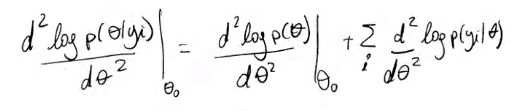

la parte de la likelihood (segundo termino) crece con $n$, osea cuando tengo muchos obs la likelihood le va a ganar al otro termino

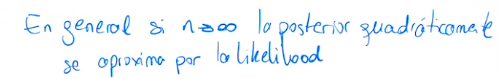

Para poder aproximar la likelihood por una normal necesito un $n$ muy grande, y si tengo un $n$ muy grande el prior "desaparece", se pierde la gracia de hacer Bayes.

Vamos a hacer una mezcla entre lo que vimos y la compu:

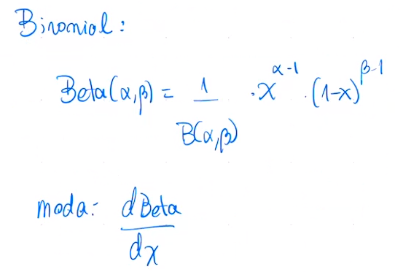

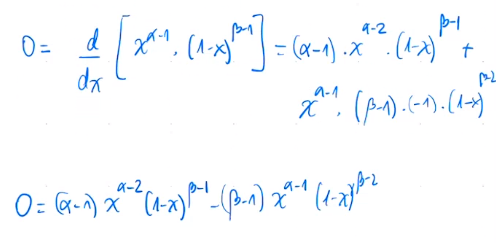  
saco factor comun  
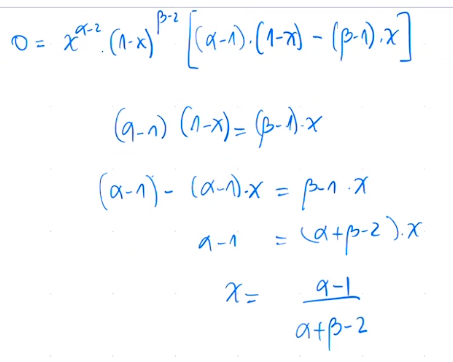  
Eso es la moda  
Y haciendo lo del log y qcy saco la varianza  
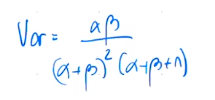 (Pablo no está seguro)

#### Compu

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

In [10]:
alpha_prior = 10
beta_prior = 10

n = 100
k = 20

# Binomial

# Likelihood
# N tiradas y k exitos
# L = comb(n, k)* theta^k * (1-theta)^(N-k)

theta = np.linspace(0,1,1000)
# prior uniform

def binomial_likelihood(theta, y, n):
    return comb(n, y) * theta ** y * (1 - theta) ** (n-y)

# p(theta | y) = p(theta) * p(y | theta) / C
C_posterior = []
for proba in theta:
    C_posterior = 1 * binomial_likelihood(theta, k, n)

posterior = C_posterior / sum(C_posterior[:-1] * np.diff(theta))

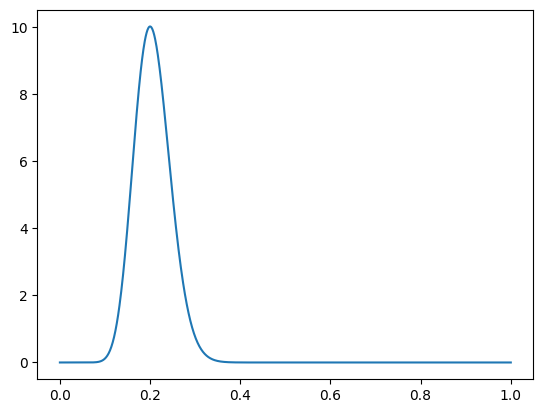

In [11]:
fig, ax = plt.subplots()
ax.plot(theta, posterior)

A medida que tengo menos puntos la dist es mas asimetrica

In [12]:
# quad (aproximacion cuadratica)
# log p = C + 1/2 * d2/dtheta^2 (logp) * (theta -theta_hat)
# p = C*exp(-172 d2/dtheta^2 log p * (theta-theta_hat))
# alpha * beta / ((alpha + beta) **2 * (alpha + beta + 1))

In [15]:
alpha = 20
beta = 80

p_quad_var = alpha * beta / ((alpha + beta) **2 * (alpha + beta + 1)) 
p_quad_moda = (alpha - 1) / (alpha + beta - 2)

C_p_quad = np.exp(-1/2 * (theta - p_quad_moda)**2 / (p_quad_var))
p_quad = C_p_quad / sum(C_p_quad[:-1] * np.diff(theta))

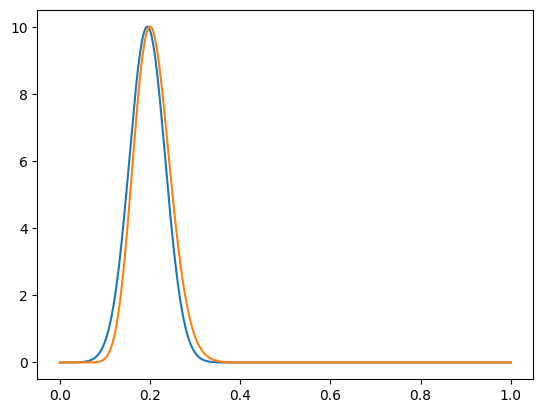

In [16]:
fig, ax = plt.subplots()
ax.plot(theta, p_quad, label = "quad")
ax.plot(theta, posterior, label = "grid")

Quedo mal, en la proxima clase lo arreglamos

Conclusion: aproximacion cuadratica no es una estrategia que vayamos a usar porque se pierde la gracia de hacer Bayes (tener pocas muestras y etc.)

# Practica

### Repaso Bayes

+ $P(\theta|y) = \frac{P(y|\theta)P(\theta)}{P(y)}$ : posterior

+ $P(y|\theta)$ : Verosimilitud

+ $P(\theta)$ : Prior
  + Informativos:  
  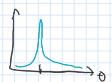
  + no Informativos:  
  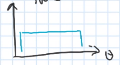
  + Conjugado:
    + pueden ser informativos o no informativos
    + 
    + La posterior tiene la misma distribucion que el prior
  

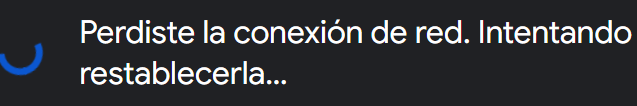



#### Distribución normal con $\sigma$ conocido:

verosimilitud:  
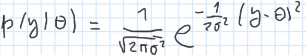

El prior conjugado para una normal es otra normal

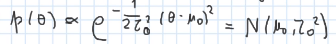

con este prior conjugado y la verosimilitud puedo escribir la posterior:  

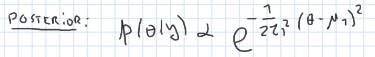  
con media y varianza:  
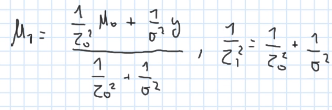


#### Distribucion normal con $\sigma$ conocido (varias observaciones)

$y \rightarrow y_1,....,y_n$

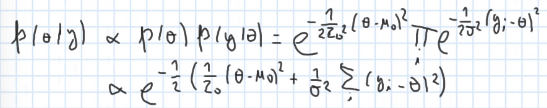  
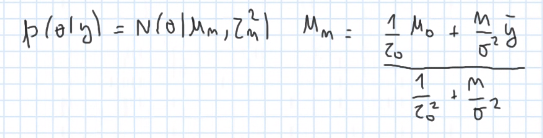  
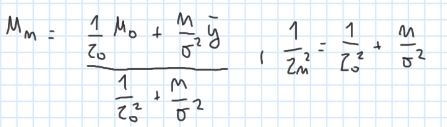  


+ $n \rightarrow \infty \Rightarrow P(\theta|y) \approx  N(\theta|\overline{y}, \frac{\sigma^2}{n})$  
+ $\tau_0\rightarrow \infty \Rightarrow$ lo mismo
+ $\sigma\rightarrow -\infty\Rightarrow$ lo mismo



#### Ejercicio 10 practica 6

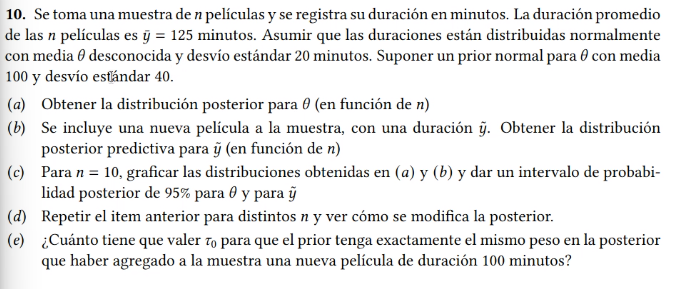

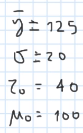  
a)  
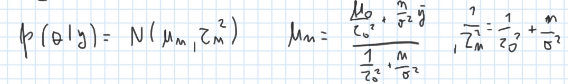

b) 